In [1]:
# Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('wine.csv')
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# creating dataframe
df_wine=pd.DataFrame(data=df)
df_wine

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


####  'Class' is the label/target which is: (1,2,3) ,thus i am using Logistic Regresiion and Classification models.

In [4]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                   178 non-null int64
Alcohol                 178 non-null float64
Malic acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity of ash       178 non-null float64
Magnesium               178 non-null int64
Total phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color intensity         178 non-null float64
Hue                     178 non-null float64
diluted wines           178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
# checking whether is there any null value
df_wine.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

In [6]:
df_wine.dtypes

Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
diluted wines           float64
Proline                   int64
dtype: object

In [7]:
df_wine.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

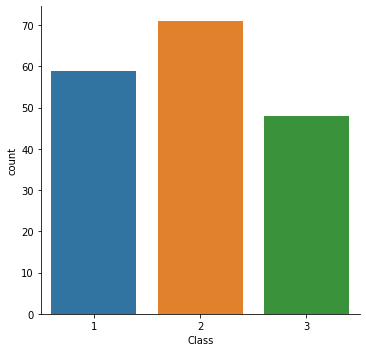

In [8]:
sns.catplot(x='Class',data=df_wine,kind='count')

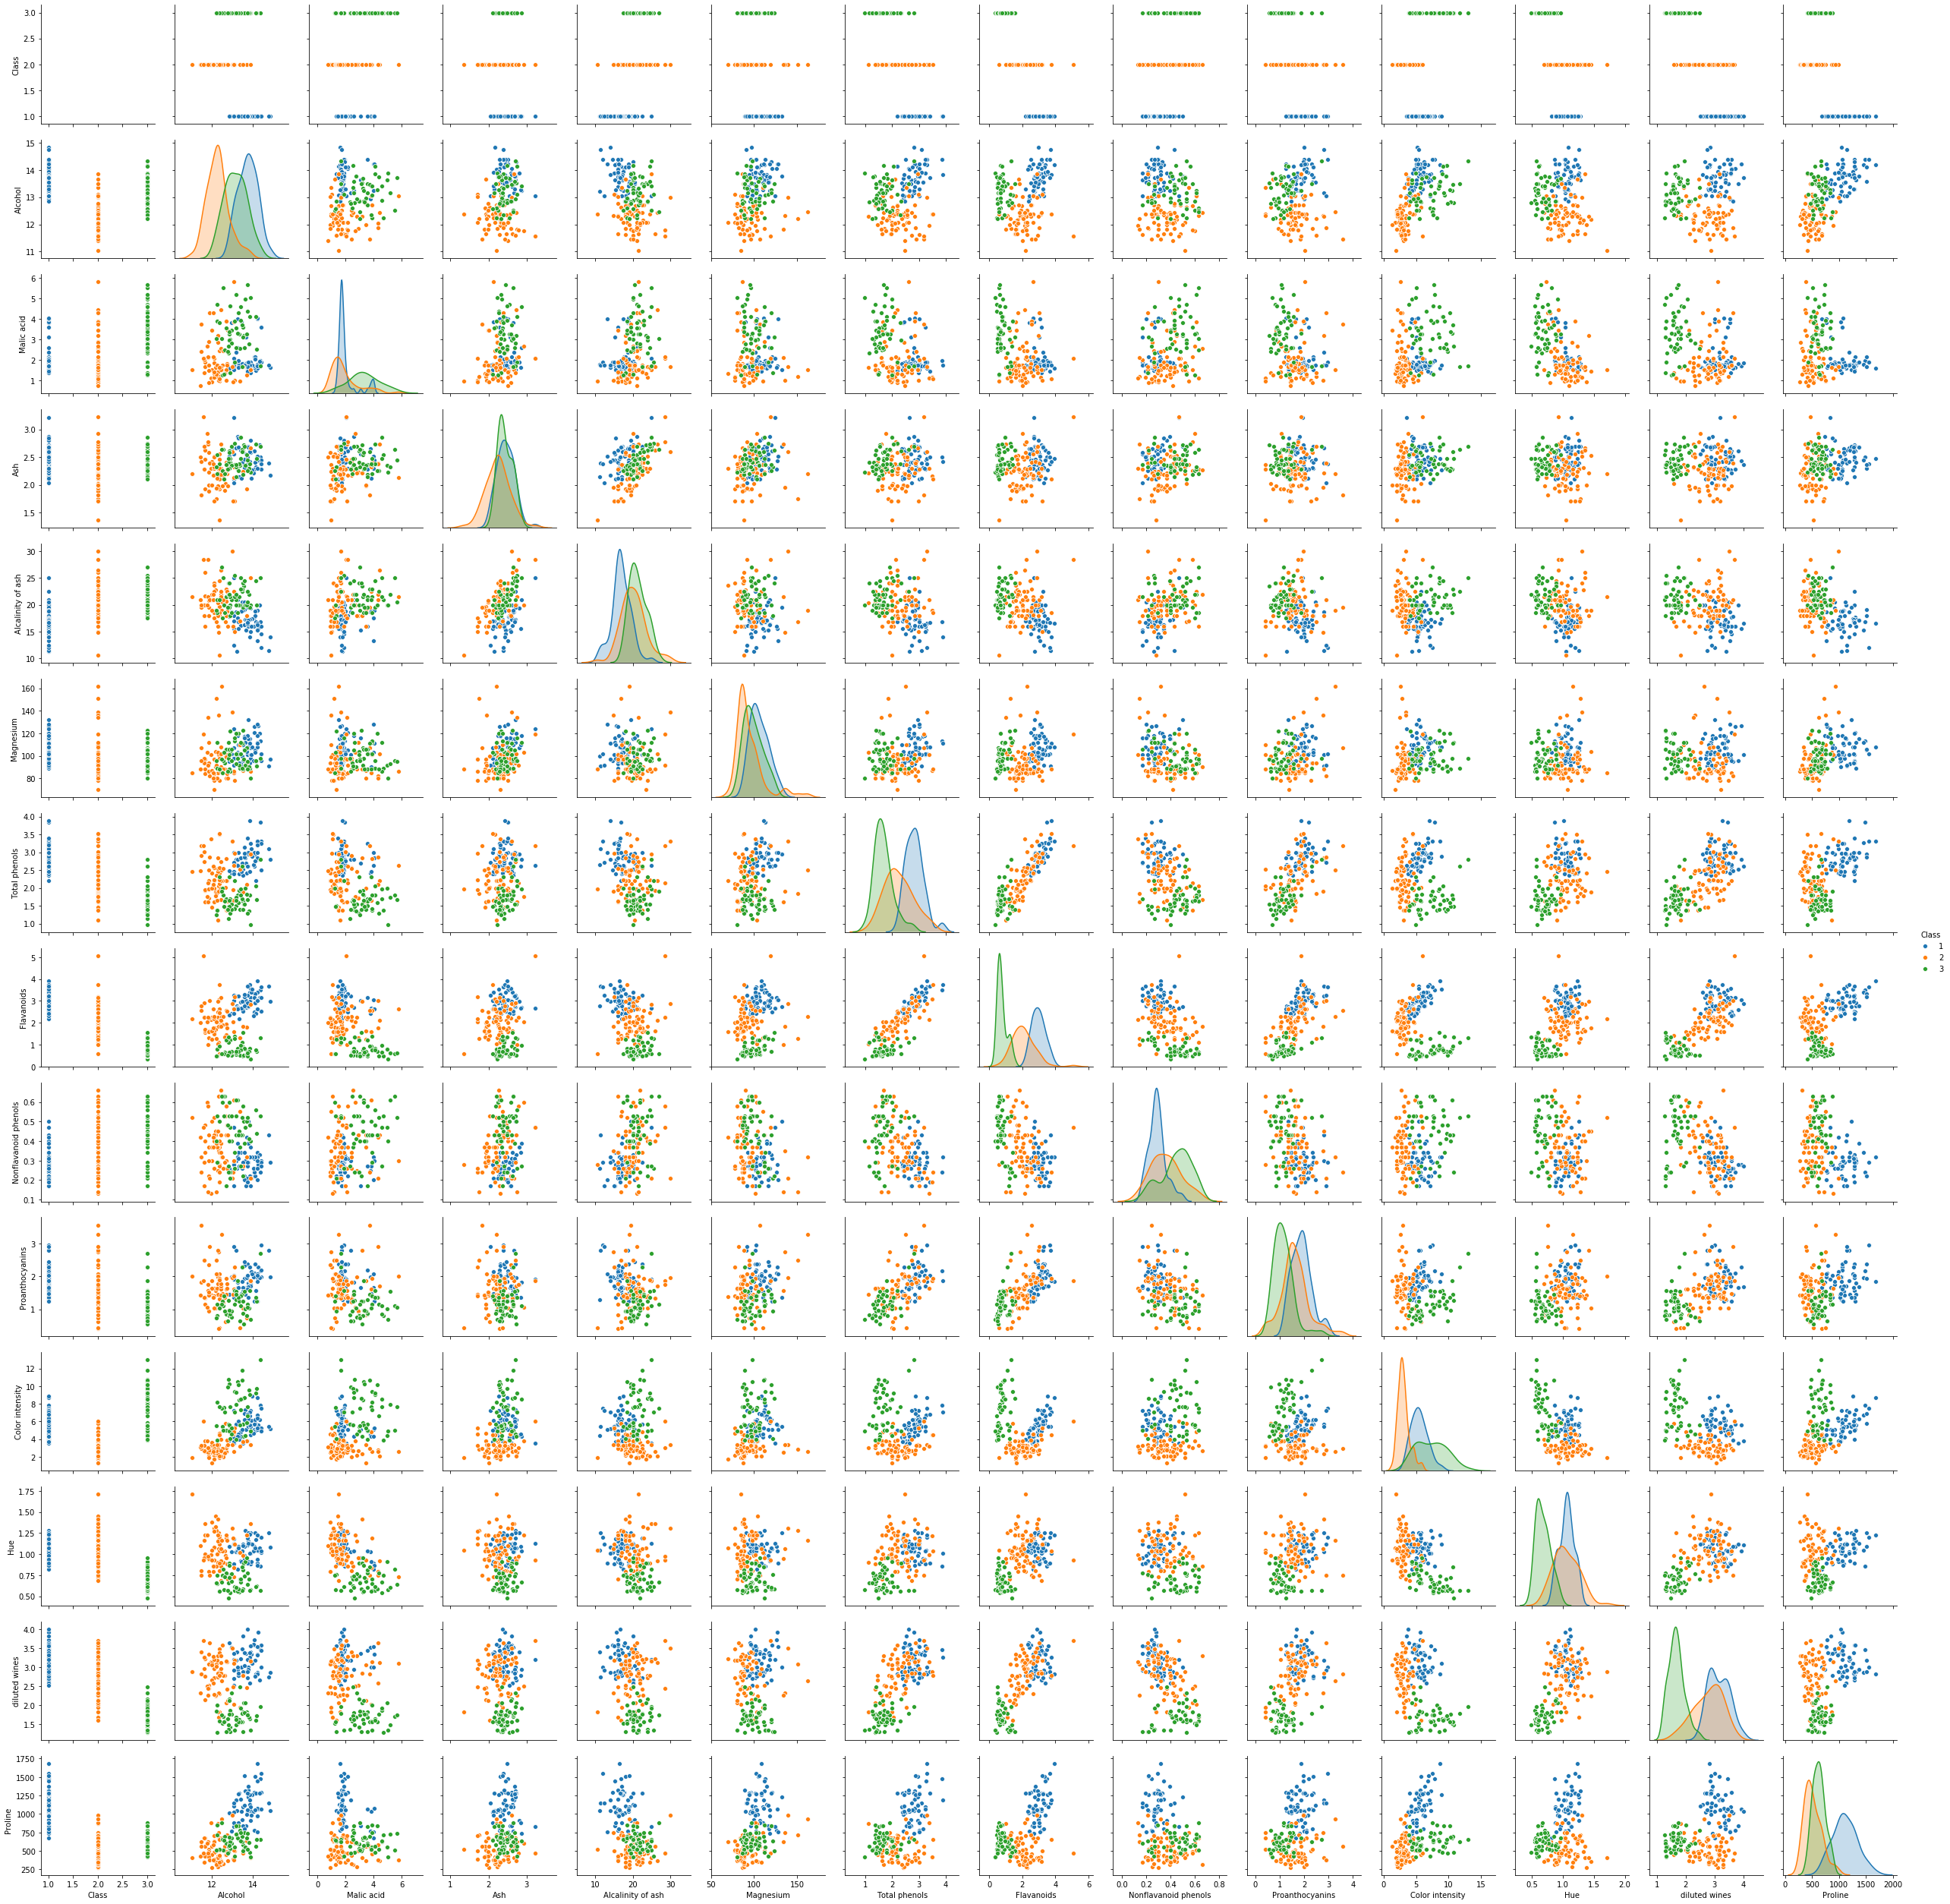

In [9]:
sns.pairplot(df_wine,hue="Class")

In [10]:
for col in df_wine.columns.values:
    print("Number of unique values of{} :{} ".format(col,df_wine[col].nunique()))

Number of unique values ofClass :3 
Number of unique values ofAlcohol :126 
Number of unique values ofMalic acid :133 
Number of unique values ofAsh :79 
Number of unique values ofAlcalinity of ash :63 
Number of unique values ofMagnesium :53 
Number of unique values ofTotal phenols :97 
Number of unique values ofFlavanoids :132 
Number of unique values ofNonflavanoid phenols :39 
Number of unique values ofProanthocyanins :101 
Number of unique values ofColor intensity :132 
Number of unique values ofHue :78 
Number of unique values ofdiluted wines :122 
Number of unique values ofProline     :121 


(14.0, 0.0)

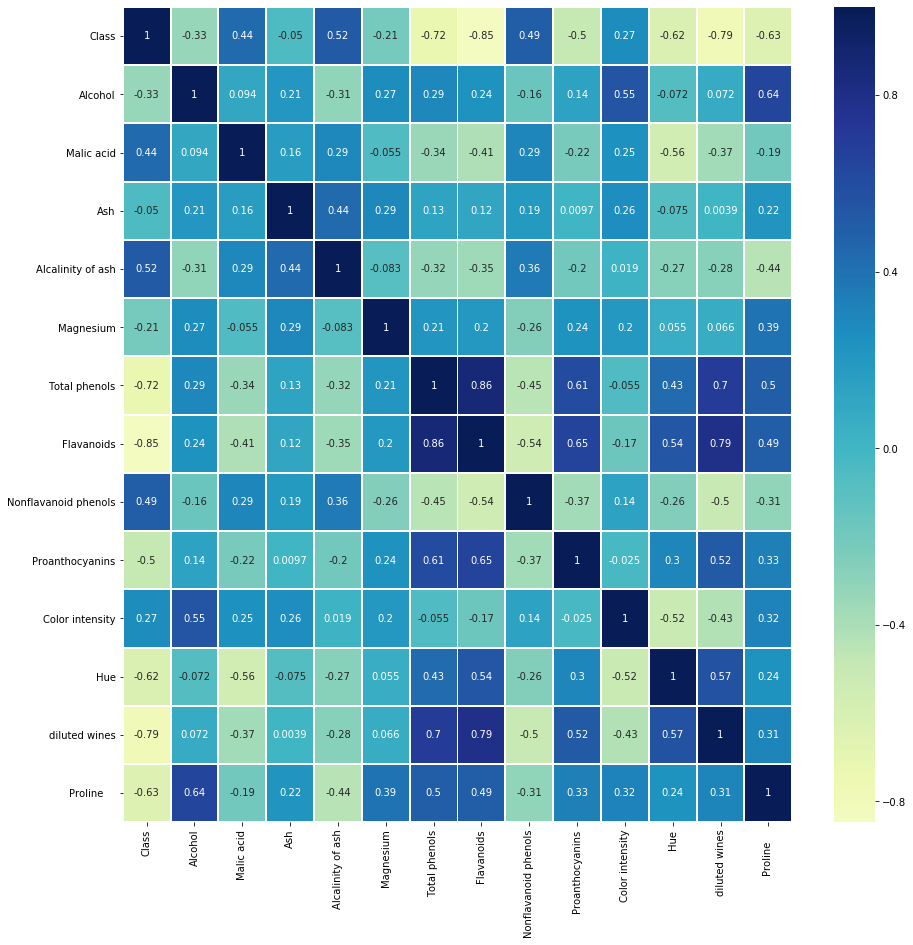

In [11]:
#Heatmap
fig, ax =plt.subplots(figsize=(15,15))
sns.heatmap(df_wine.corr(),annot=True,linewidths=1,center=0,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [12]:
#Using log for skewness improvement 
for i in df_wine.columns:
    if df_wine.skew().loc[i]>0.55:
        df_wine[i]=np.log1p(df_wine[i])

In [13]:
# Checking Skewness
df_wine.skew()

Class                   0.107431
Alcohol                -0.051482
Malic acid              0.529222
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               0.605723
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.097222
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.087930
dtype: float64

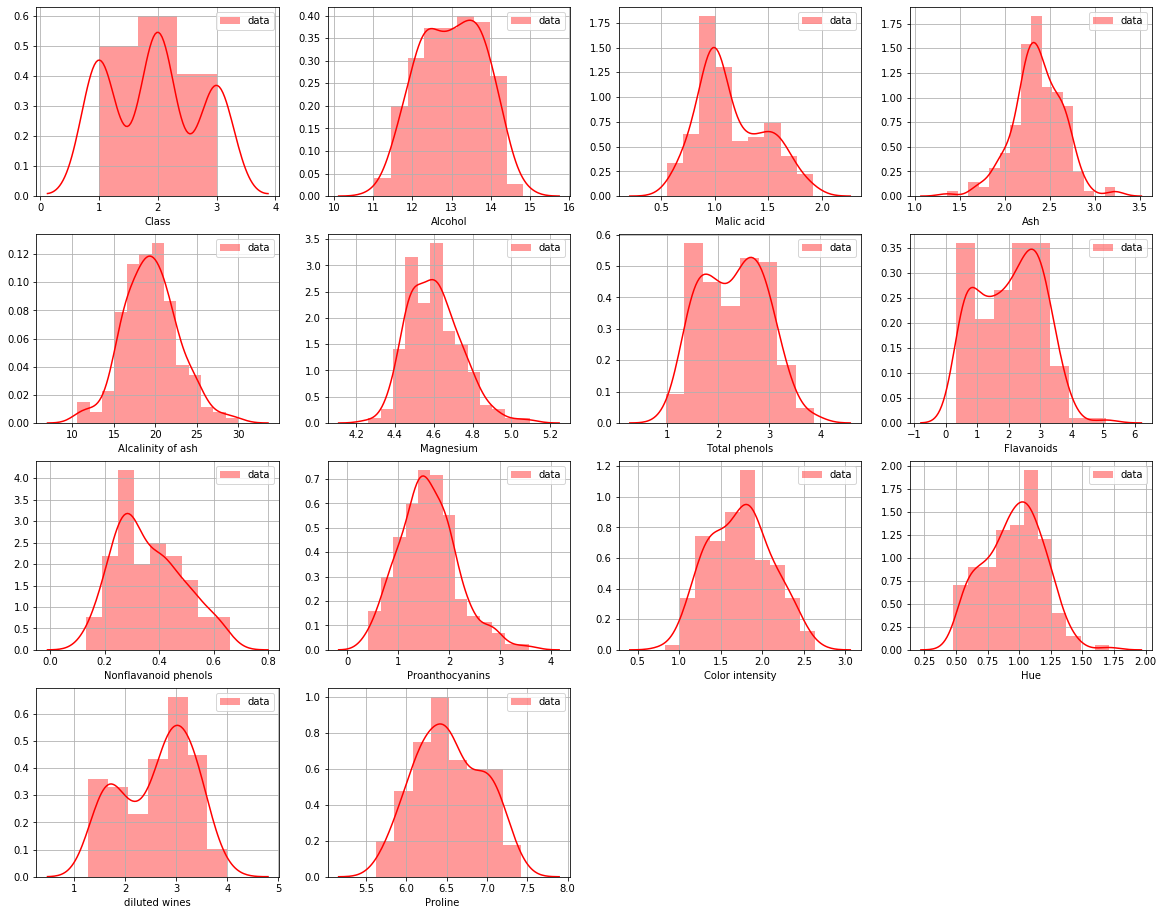

In [14]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_wine.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df_wine[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

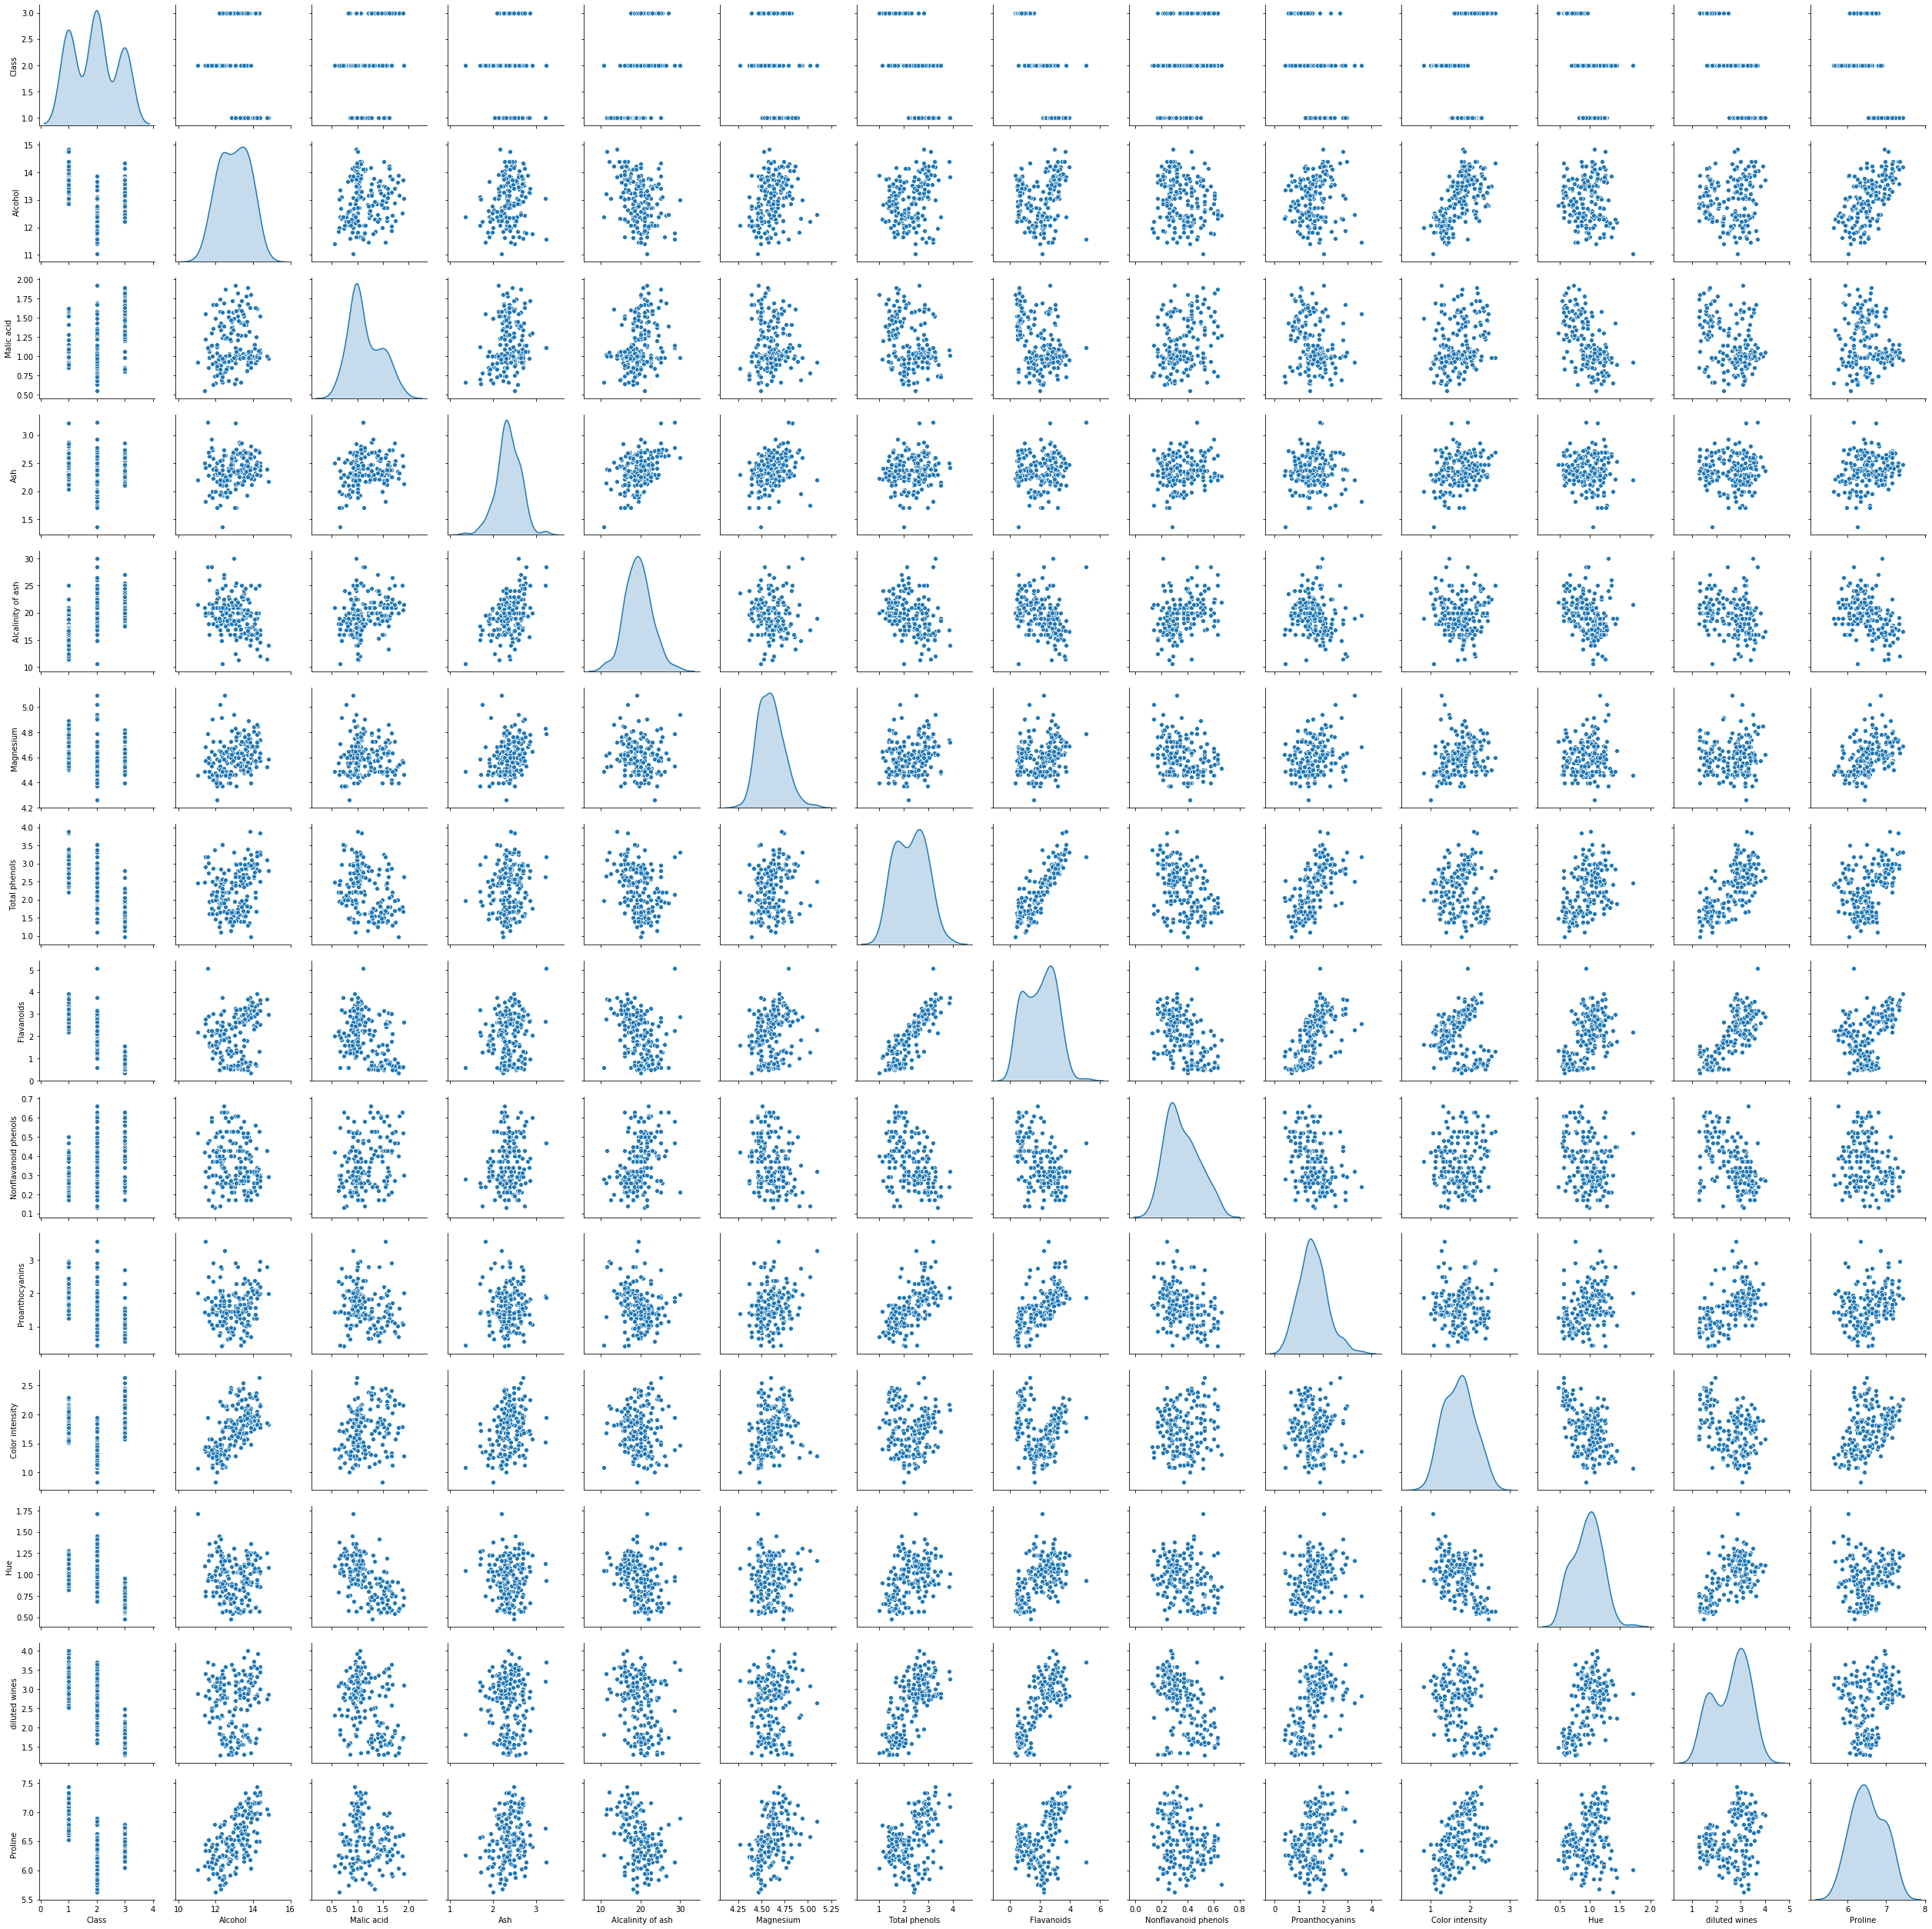

In [15]:
sns.pairplot(data=df_wine,kind='scatter',diag_kind='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A7B7BD548>,
      dtype=object)

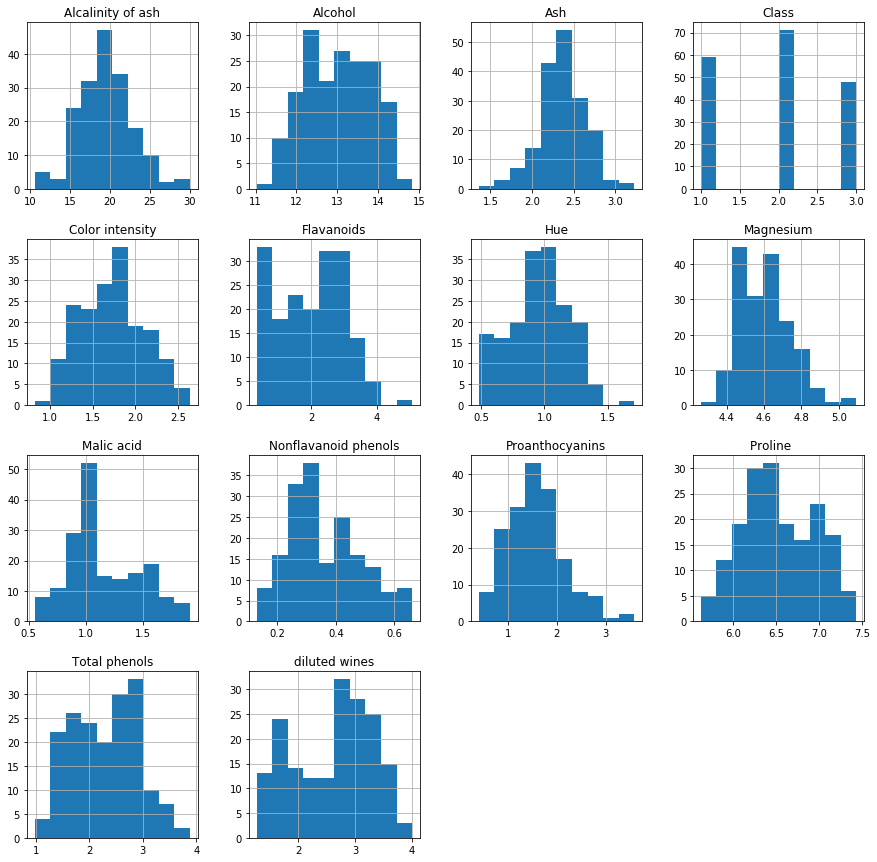

In [16]:
df_wine.hist(figsize=(15,15))

In [17]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df_wine))
print(df_wine.shape)
df_new=df_wine.loc[(z<3).all(axis=1)]
print(df_new.shape)

(178, 14)
(170, 14)


In [18]:
#checking skewness
df_new.skew()

Class                   0.104977
Alcohol                -0.030651
Malic acid              0.510074
Ash                    -0.243064
Alcalinity of ash       0.094425
Magnesium               0.271262
Total phenols           0.111388
Flavanoids             -0.076427
Nonflavanoid phenols    0.474603
Proanthocyanins         0.354703
Color intensity         0.063903
Hue                    -0.121305
diluted wines          -0.279718
Proline                 0.081052
dtype: float64

In [19]:
y=df_new['Class']
y.shape

(170,)

In [20]:
df_final=df_new.drop(['Flavanoids','Class'],axis=1)
df_final.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,14.23,0.996949,2.43,15.6,4.852030,2.80,0.28,2.29,1.893112,1.04,3.92,6.971669
1,13.20,1.022451,2.14,11.2,4.615121,2.65,0.26,1.28,1.682688,1.05,3.40,6.957497
2,13.16,1.211941,2.67,18.6,4.624973,2.80,0.30,2.81,1.899118,1.03,3.17,7.078342
3,14.37,1.081805,2.50,16.8,4.736198,3.85,0.24,2.18,2.174752,0.86,3.45,7.300473
4,13.24,1.278152,2.87,21.0,4.779123,2.80,0.39,1.82,1.671473,1.04,2.93,6.601230
5,14.20,1.015231,2.45,15.2,4.727388,3.27,0.34,1.97,2.047693,1.05,2.85,7.280008
6,14.39,1.054312,2.45,14.6,4.574711,2.50,0.30,1.98,1.832581,1.02,3.58,7.163172
7,14.06,1.147402,2.61,17.6,4.804021,2.60,0.31,1.25,1.800058,1.06,3.58,7.167038
8,14.83,0.970779,2.17,14.0,4.584967,2.80,0.29,1.98,1.824549,1.08,2.85,6.952729
9,13.86,0.854415,2.27,16.0,4.595120,2.98,0.22,1.85,2.106570,1.01,3.55,6.952729


In [21]:
# Using Standars Scaler for Scaling of data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x1=scale.fit_transform(df_final)
x=pd.DataFrame(x1,columns=df_final.columns)
x

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1.500539,-0.533113,0.247810,-1.218202,2.094667,0.834514,-0.673891,1.364076,0.393144,0.417467,1.862406,1.047243
1,0.200661,-0.450687,-0.945258,-2.626136,0.167501,0.594196,-0.835701,-0.529923,-0.177881,0.462687,1.131045,1.013283
2,0.150180,0.161764,1.235176,-0.258247,0.247646,0.834514,-0.512081,2.339204,0.409443,0.372246,0.807558,1.302878
3,1.677222,-0.258848,0.535791,-0.834220,1.152422,2.516735,-0.997511,1.157799,1.157428,-0.396506,1.201368,1.835200
4,0.251142,0.375765,2.057981,0.509717,1.501600,0.834514,0.216064,0.482710,-0.208315,0.417467,0.470007,0.159512
...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.844290,2.368239,0.330090,0.349725,-0.245511,-0.959856,1.267829,-0.942477,1.126414,-1.391361,-1.203685,0.175737
166,0.453064,1.387805,0.453511,1.149687,0.327008,-0.767602,0.539684,-0.286141,0.998687,-1.120037,-1.456848,0.207861
167,0.289002,1.622624,-0.451575,0.189732,1.637180,-1.104046,0.539684,-0.398655,1.811868,-1.617464,-1.456848,0.464814
168,0.162800,0.375765,0.000968,0.189732,1.637180,-1.007919,1.348734,-0.192378,1.584542,-1.572243,-1.372460,0.479104


In [22]:
#checking shape
x.shape


(170, 12)

In [23]:
#checking shape
y.shape

(170,)

###                          Using Grid Search to find Best Parameters

In [24]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,cv):
    clf = GridSearchCV(mod,parameters, cv=10)
    clf.fit(x,y)
    print(clf.best_params_)

In [25]:
#     Grid Search for DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],"random_state":np.arange(1,20)}
grid_cv(dt,parameters,10)


{'criterion': 'gini', 'max_depth': 5, 'random_state': 19}


In [26]:
#     Grid Search for GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
grid_cv(gbc,parameters,10)


{'learning_rate': 0.01, 'n_estimators': 1000}


In [27]:
#     Grid Search for KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={"n_neighbors":np.arange(1,25)}
grid_cv(knn,parameters,10)

{'n_neighbors': 10}


In [28]:
#     Grid Search for SVC
svc=SVC()
parameters={"random_state":np.arange(1,20),'gamma': [1e-3, 1e-4]}
grid_cv(svc,parameters,10)

{'gamma': 0.001, 'random_state': 1}


In [29]:
#     Grid Search for LogisticRegression
lr=LogisticRegression()
parameters={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_cv(lr,parameters,10)

{'C': 0.1}


In [30]:
#     Grid Search for RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators': [200, 700,1000,2000],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters,10)

{'max_features': 'auto', 'n_estimators': 700}


In [31]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
       # print('r2 score corresponding to random state ',r_state,'is: ',acc_score)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

In [32]:
#           Defining Instances For Differnt Models.
KNN=KNeighborsClassifier(n_neighbors=10)
SV=SVC(gamma=0.001,random_state=1)
LR=LogisticRegression(C=0.1)
DT=DecisionTreeClassifier(max_depth=5,random_state=19)
GNB=GaussianNB()
GBC=GradientBoostingClassifier(learning_rate=0.01,n_estimators=1000)
RF=RandomForestClassifier(max_features= 'auto', n_estimators= 200,)

In [33]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))

In [34]:
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
    score=model.score(x_test, y_test)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
    print('\n')
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
    
#roc auc score    
    #false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
   # roc_auc=auc(false_positive_rate, true_positive_rate)
   # print('roc auc score : ', roc_auc)
    #rocscore.append(roc_auc*100)
   # print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    #plt.figure(figsize=(10,40))
    #plt.subplot(911)
    #plt.title(name)
    #plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    #plt.plot([0,1],[0,1],'r--')
    #plt.legend(loc='lower right')
    #plt.ylabel('True_positive_rate')
    #plt.xlabel('False_positive_rate')
    print('\n\n')
    
    
    
    

*************************** KNeighborsClassifier *****************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Max Accuracy Score corresponding to Random State  64 is: 1.0


Learning Score :  1.0
Accuracy Score :  1.0


Cross Val Score :  0.971111111111111


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        14

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



Confusion Matrix:
 [[18  0  0]
 [ 0 19  0]
 [ 0  0 14]]





*************************** SVC *****************************


SVC(C=1.0, cache_size=200, class_weight=None, coe

In [35]:
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs})   #'Roc_Auc_curve':rocscore
result

,Model,Learning Score,Accuracy Score,Cross Val Score
0,KNeighborsClassifier,100.000000,100.000000,97.111111
1,SVC,94.117647,94.117647,97.156863
2,LogisticRegression,100.000000,100.000000,98.888889
3,DecisionTreeClassifier,98.039216,98.039216,92.013072
4,GaussianNB,100.000000,100.000000,98.300654
5,GradientBoostingClassifier,100.000000,100.000000,94.267974
6,RandomForestClassifier,100.000000,100.000000,98.888889


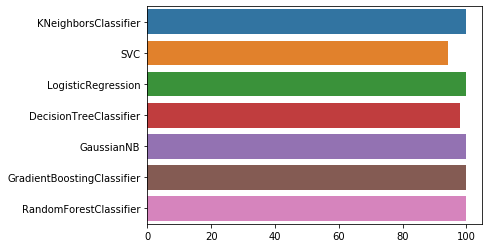

In [36]:
# visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score)


### After all this process conclusion is that except SVC and DecisionTree all the Models are performing well, and the best one is Logistic regression.

In [37]:
# Using Logistic regression for final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=.30)
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
lrpred=lr.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,lrpred))
print('Confusion Matrix:',confusion_matrix(y_test,lrpred))
print('Classification Report:',classification_report(y_test,lrpred))

Accuracy Score: 1.0
Confusion Matrix: [[19  0  0]
 [ 0 20  0]
 [ 0  0 12]]
Classification Report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        12

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



(3.0, 0.0)

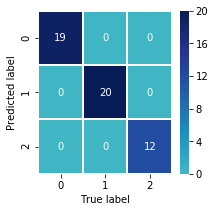

In [38]:
# Plotting Confusion matrix
fig, ax =plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, lrpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [39]:
test=pd.DataFrame(data=y_test)
test['ypred']=lrpred
test

,Class,ypred
151,3,3
164,3,3
27,1,1
46,1,1
98,2,2
14,1,1
171,3,3
81,2,2
63,2,2
94,2,2


In [40]:
from sklearn.externals import joblib
joblib.dump(lr,'Wine_Datset.pkl')

['Wine_Datset.pkl']

In [41]:
model=joblib.load('Wine_Datset.pkl')
model.predict(x_test)

array([3, 3, 1, 1, 2, 1, 3, 2, 2, 2, 2, 2, 1, 2, 3, 1, 2, 3, 3, 1, 1, 1,
       2, 3, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 3, 2, 1, 1, 3, 3, 3, 1, 2, 2,
       1, 2, 2, 1, 3, 2, 2], dtype=int64)